In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dynamics of Fixed and Variable Tether with and without wind disturbances

### Fixed Tether
The fixed tether dynamics are obtained by taking the equilibrium of forces in the tangential direction:
\begin{align*}
x &= l \sin{\theta(t)} \\
\dot{x} &= l \cos{\theta(t)} \dot{\theta(t)}
\end{align*}

\begin{align*}
\Sigma F_{\text{tangential}} &= T - mg \sin{\theta} + C_D (V_{\text{wind}} - \dot{x})  = T - mg \sin{\theta} + C_D (V_{\text{wind}}- l \cos{\theta}\dot{\theta}) = ml \ddot{\theta}\\
\implies \ddot{\theta} &= \frac{T}{ml} - \frac{g}{l}\sin{\theta} +\frac{C_D}{ml}(V_{\text{wind}} - l \cos{\theta}\dot{\theta})\\
\implies \ddot{\theta} &\approx \frac{T}{ml} - \frac{g}{l}\theta +\frac{C_D}{ml}(V_{\text{wind}} - l \dot{\theta}) \quad \text{(for small angles)}\\

\end{align*}

### Varying Tether

The Lagrangian derivation for a mass on a variable‐length tether (no small‐angle approximation), with thrust $T$ perpendicular to the tether and wind $V_{\rm wind}$ in the $+x$ (leftward) direction:

\begin{align*}
x(t) &= \ell(t)\,\sin\theta(t) \\
z(t) &= \ell(t)\,\cos\theta(t)
\end{align*}

\begin{align*}
\dot x(t) &= \dot\ell(t)\,\sin\theta(t) + \ell(t)\,\cos\theta(t)\,\dot\theta(t) \\
\dot z(t) &= \dot\ell(t)\,\cos\theta(t) - \ell(t)\,\sin\theta(t)\,\dot\theta(t)
\end{align*}

Kinetic energy:
\begin{align*}
T &= \tfrac12\,m\bigl(\dot x^2 + \dot z^2\bigr)
   = \tfrac12\,m\bigl(\dot\ell^2 + \ell^2\,\dot\theta^2\bigr)
\end{align*}

Potential energy:
\begin{align*}
U &= m\,g\,z(t) = m\,g\,\ell(t)\,\cos\theta(t)
\end{align*}

Lagrangian:

\begin{align*}
\mathcal{L} &= T - U
= \tfrac12\,m\bigl(\dot\ell^2 + \ell^2\,\dot\theta^2\bigr)
  - m\,g\,\ell\,\cos\theta
\end{align*}

Euler–Lagrange in $\theta$:

\begin{align*}
\frac{d}{dt}\!\bigl(\partial_{\dot\theta}\mathcal L\bigr)
- \partial_{\theta}\mathcal L &= Q_\theta,\\
\partial_{\dot\theta}\mathcal L &= m\,\ell^2\,\dot\theta,\\
\frac{d}{dt}\bigl(m\ell^2\dot\theta\bigr)
&= m\bigl(\ell^2\ddot\theta + 2\,\ell\,\dot\ell\,\dot\theta\bigr),\\
\partial_{\theta}\mathcal L &= m\,g\,\ell\,\sin\theta,\\
\implies m\bigl(\ell^2\ddot\theta + 2\,\ell\,\dot\ell\,\dot\theta\bigr)
- m\,g\,\ell\,\sin\theta &= Q_\theta.
\end{align*}

Non‐conservative torques in $\theta$:

\begin{align*}
Q_\theta^{(T)} &= \ell\,T,\\
Q_\theta^{(D)} &= \ell\,C_{D}\,(V_{\rm wind}-\dot x)\,\cos\theta
= \ell\,C_{D}\bigl(V_{\rm wind}-\dot\ell\sin\theta - \ell\cos\theta\,\dot\theta\bigr)\cos\theta.
\end{align*}

Equation of motion:

\begin{align*}
m\bigl(l^2\ddot\theta + 2\,l\,\dot l\,\dot\theta - g\,l\,\sin\theta\bigr)
&= l\,T + l\,C_D\bigl(V_{\text{wind}} - \dot l\,\sin\theta - l\cos\theta\,\dot\theta\bigr)\cos\theta
\$6pt]
\implies 
\frac{m\bigl(l^2\ddot\theta + 2\,l\,\dot l\,\dot\theta - g\,l\,\sin\theta\bigr)}{m\,l^2}
&= 
\frac{l\,T + l\,C_D\bigl(V_{\text{wind}} - \dot l\,\sin\theta - l\cos\theta\,\dot\theta\bigr)\cos\theta}
     {m\,l^2}
\$6pt]
\implies 
\ddot\theta + 2\,\frac{\dot l}{l}\,\dot\theta - \frac{g}{l}\,\sin\theta
&= 
\frac{T}{m\,l}
+ \frac{C_D}{m\,l}\,\cos\theta\,
  \bigl(V_{\text{wind}} - \dot l\,\sin\theta - l\cos\theta\,\dot\theta\bigr)
\end{align*}

For small angles $\sin\theta\approx\theta$, $\cos\theta\approx1$:

\begin{align*}
\ddot\theta + 2\,\frac{\dot l}{l}\,\dot\theta - \frac{g}{l}\,\theta
&\approx 
\frac{T}{m\,l}
+ \frac{C_D}{m\,l}\,\bigl(V_{\text{wind}} - \dot l\,\theta - l\,\dot\theta\bigr) \\
\implies
\ddot\theta &=
\Bigl(-2\frac{\dot l}{l} - \frac{C_D}{m}\Bigr)\dot\theta
+ \Bigl(\frac{g}{l} - \frac{C_D\,\dot l}{m\,l}\Bigr)\theta
+ \frac{1}{m\,l} (T + C_D*V_{\text{wind}})
\end{align*}




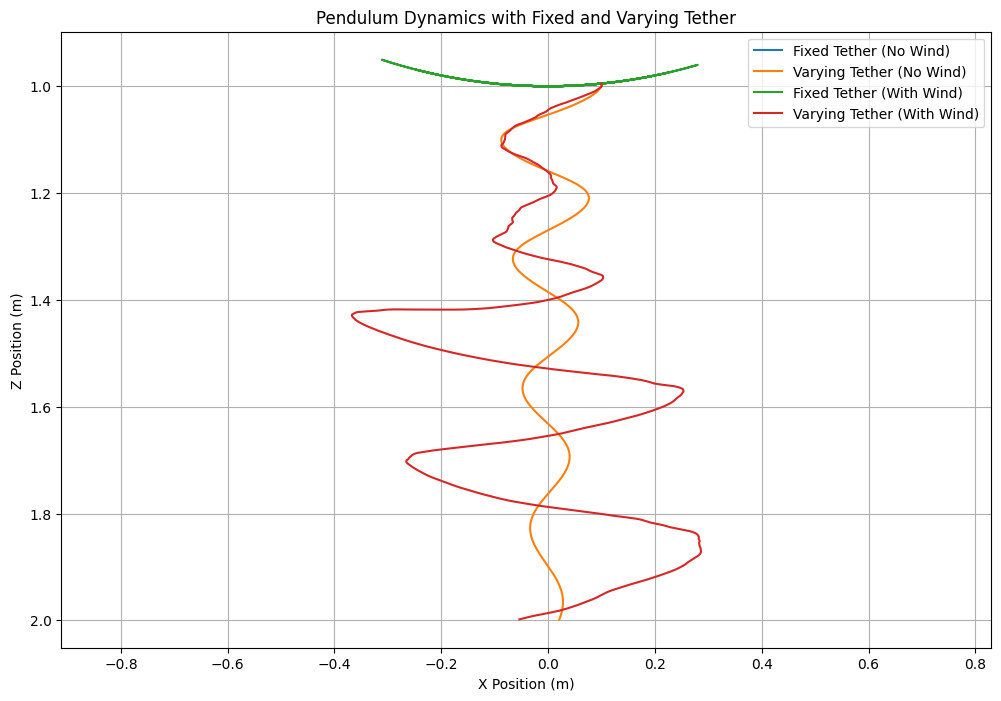

In [2]:
# Constants
g = 9.81    # Acceleration due to gravity (m/s^2)
m = 1.0     # Mass of the pendulum bob (drone) (kg)
ell0 = 1.0  # Initial/Fixed length of the pendulum (m)
C_D = 0.3   # drag coefficient (-)
thrust_value = 0.0  # No thrust
ell_dot_value = 0.1  # Varying tether length rate (m/s)
v_wind_abs_max = 20.0  # Maximum wind speed (m/s)

# Fixed tether dynamics
def dynamics_fixed(x, u, d):
    '''
    x: state vector [theta, theta_dot]
    u: control input [T]
    d: disturbance [V_wind]

    returns [theta_dot, theta_ddot]
    '''
    theta, theta_dot = x
    thrust = u[0]
    v_wind = d[0]
    theta_ddot = thrust/(m*ell0) -g/ell0*np.sin(theta) + C_D/(m*ell0)*(v_wind - ell0*theta_dot)
    return np.array([theta_dot, theta_ddot])

# Varying tether length dynamics
def dynamics_varying(x, u, d):
    '''
    x: state vector [theta, theta_dot, ell]
    u: control input [T, ell_dot]
    d: disturbance [V_wind]

    returns [theta_dot, theta_ddot, ell_dot]
    '''
    theta, theta_dot, ell = x
    thrust = u[0]
    ell_dot = u[1]
    v_wind = d[0]
    theta_ddot = ( thrust/(m*ell)
                - (g/ell)*np.sin(theta)
                - 2*(ell_dot/ell)*theta_dot
                + C_D/(m*ell)*(v_wind - (ell_dot*np.sin(theta) + ell*np.cos(theta)*theta_dot)) * np.cos(theta)
                )
    return np.array([theta_dot, theta_ddot, ell_dot])

# RK4 integrator
def rk4_step(f, x, u, d, dt):
    k1 = f(x, u, d)
    k2 = f(x + 0.5 * dt * k1, u, d)
    k3 = f(x + 0.5 * dt * k2, u, d)
    k4 = f(x + dt * k3, u, d)
    return x + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Simulate Fixed and Varying Tether Dynamics with and without wind, no thrust
# All on same plot with legend
dt = 0.01   # Time step (s)
T_sim = 10 # Total simulation time (s)
N = int(T_sim / dt)  # Number of simulation steps

# Initial conditions
x0_fixed = np.array([0.1, 0.0])  # [theta, theta_dot]
x0_varying = np.array([0.1, 0.0, ell0])  # [theta, theta_dot, ell]

# pre-allocate numpy arrays
xs_fixed_no_wind = np.zeros((N, 2))
xs_varying_no_wind = np.zeros((N, 3)) 
xs_fixed_wind = np.zeros((N, 2))  
xs_varying_wind = np.zeros((N, 3)) 

# Initialize state arrays
xs_fixed_no_wind[0] = x0_fixed
xs_varying_no_wind[0] = x0_varying
xs_fixed_wind[0] = x0_fixed
xs_varying_wind[0] = x0_varying

for i in range(1, N):
    v_wind_value = np.random.uniform(-v_wind_abs_max, v_wind_abs_max)  # Sample wind speed

    # Fixed tether dynamics (no wind)
    x_fixed_no_wind = xs_fixed_no_wind[i-1]
    u_fixed_no_wind = np.array([thrust_value])
    d_fixed_no_wind = np.array([0.0])  # No wind disturbance
    x_fixed_next_no_wind = rk4_step(dynamics_fixed, x_fixed_no_wind, u_fixed_no_wind, d_fixed_no_wind, dt)
    xs_fixed_no_wind[i] = x_fixed_next_no_wind

    # Varying tether dynamics (no wind)
    x_varying_no_wind = xs_varying_no_wind[i-1]
    u_varying_no_wind = np.array([thrust_value, ell_dot_value])
    d_varying_no_wind = np.array([0.0])  # No wind disturbance
    x_varying_next_no_wind = rk4_step(dynamics_varying, x_varying_no_wind, u_varying_no_wind, d_varying_no_wind, dt)
    xs_varying_no_wind[i] = x_varying_next_no_wind

    # Fixed tether dynamics (with wind)
    x_fixed_with_wind = xs_fixed_wind[i-1]
    u_fixed_with_wind = np.array([thrust_value])
    d_fixed_with_wind = np.array([v_wind_value])
    x_fixed_next_with_wind = rk4_step(dynamics_fixed, x_fixed_with_wind, u_fixed_with_wind, d_fixed_with_wind, dt)
    xs_fixed_wind[i] = x_fixed_next_with_wind

    # Varying tether dynamics (with wind)
    x_varying_with_wind = xs_varying_wind[i-1]
    u_varying_with_wind = np.array([thrust_value, ell_dot_value])
    d_varying_with_wind = np.array([v_wind_value])
    x_varying_next_with_wind = rk4_step(dynamics_varying, x_varying_with_wind, u_varying_with_wind, d_varying_with_wind, dt)
    xs_varying_wind[i] = x_varying_next_with_wind

# Convert to x–z coordinates
def get_xz_trace(theta_array, ell_array):
    x = ell_array * np.sin(theta_array)
    z = ell_array * np.cos(theta_array)
    return x, z

theta_fixed_no_wind = xs_fixed_no_wind[:, 0]
ell_fixed_no_wind = ell0 * np.ones_like(theta_fixed_no_wind)
x_fixed_no_wind, z_fixed_no_wind = get_xz_trace(theta_fixed_no_wind, ell_fixed_no_wind)

theta_varying_no_wind = xs_varying_no_wind[:, 0]
ell_varying_no_wind = xs_varying_no_wind[:, 2]
x_varying_no_wind, z_varying_no_wind = get_xz_trace(theta_varying_no_wind, ell_varying_no_wind)

theta_fixed_with_wind = xs_fixed_wind[:, 0]
ell_fixed_with_wind = ell0 * np.ones_like(theta_fixed_with_wind)
x_fixed_with_wind, z_fixed_with_wind = get_xz_trace(theta_fixed_with_wind, ell_fixed_with_wind)

theta_varying_with_wind = xs_varying_wind[:, 0]
ell_varying_with_wind = xs_varying_wind[:, 2]
x_varying_with_wind, z_varying_with_wind = get_xz_trace(theta_varying_with_wind, ell_varying_with_wind)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_fixed_no_wind, z_fixed_no_wind, label='Fixed Tether (No Wind)')
plt.plot(x_varying_no_wind, z_varying_no_wind, label='Varying Tether (No Wind)')
plt.plot(x_fixed_with_wind, z_fixed_with_wind, label='Fixed Tether (With Wind)')
plt.plot(x_varying_with_wind, z_varying_with_wind, label='Varying Tether (With Wind)')
plt.title('Pendulum Dynamics with Fixed and Varying Tether')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.xlabel('X Position (m)')
plt.ylabel('Z Position (m)')
plt.legend()
plt.grid()

# Pendulum-on-Tether Control System

---

## 1. Nonlinear Dynamics (no small-angle approx.)

Let  
$$
x = \begin{bmatrix}\theta\\\dot\theta\end{bmatrix},\quad
u = \begin{bmatrix}T\end{bmatrix},\quad
d = \begin{bmatrix}V_{\rm wind}\end{bmatrix}.
$$
Then the full nonlinear vector field is

\begin{align*}
f(x,u,d)
&=\begin{bmatrix}
\dot\theta
\dfrac{T}{m\,\ell_0}
- \dfrac{g}{\ell_0}\,\sin\theta
+ \dfrac{C_D}{m\,\ell_0}\,\bigl(V_{\rm wind}-\ell_0\cos\theta\,\dot\theta\bigr)\cos\theta
\end{bmatrix}.
\end{align*}


---

## 2. State-Space Form

The dynamics evolve as
$$
\dot x = f(x,u,d).
$$

---

## 3. Time-Varying Swing Bound

Define a “cone” on the allowed swing angle that shrinks from $\theta_{\rm init}$ at $t=0$ to $\theta_{\rm final}$ at $t=T$:
$$
s(t)
=\theta_{\rm init}
+\frac{\theta_{\rm final}-\theta_{\rm init}}{T}\,t,
\quad
|\theta(t)|\le s(t).
$$

---

## 4. Linearization via Jacobians

At each time step $k$ we linearize about $(x_k,u_k,d_k)$:
$$
\dot x \approx A_k x + B_k u + E_k d,
$$
where the Jacobians are defined mathematically by
\begin{align*}
A_k &\;=\;\frac{\partial f}{\partial x}\Bigl(x_k,u_k,d_k\Bigr),\\
B_k &\;=\;\frac{\partial f}{\partial u}\Bigl(x_k,u_k,d_k\Bigr),\\
E_k &\;=\;\frac{\partial f}{\partial d}\Bigl(x_k,u_k,d_k\Bigr).
\end{align*}

---

## 5. Hamilton–Jacobi Reachability

Define a **time-varying** swing limit $s(t)$.  The value function

$$
V(x,t)
=\inf_{u(\cdot)}\sup_{\|d\|\le d_{\max}}
\max_{\tau\in[t,T]}\bigl(|\theta(\tau)|-s(\tau)\bigr)
$$

satisfies the linearized HJI PDE (backward in time):

$$
\frac{\partial V}{\partial t}
+ \min_{u_{\min}\le u\le u_{\max}}
  \max_{\|d\|\le d_{\max}}
  \nabla_x V^\top\bigl(A_k x + B_k u + E_k d\bigr)
=0,
\quad
V(x,T)=\max\bigl(|\theta|-s(T),0\bigr).
$$

---

## 6. Control-Barrier Function (CBF)

To enforce $|\theta|\le s(t)$ define
$$
h(x,t) = s(t)^2 - \theta^2.
$$
Then
$$
\nabla_x h = \begin{bmatrix}-2\,\theta & 0\end{bmatrix}, 
\qquad
\partial_t h = 2\,s(t)\,\dot s(t).
$$
Under the linear model
$$
\dot h
= \nabla_x h\,(A_k x + B_k u + E_k d) + \partial_t h
= L_f h + L_g h\,u + L_d h\,d + \partial_t h,
$$
with
$$
L_f h = \nabla_x h\,A_k x,\quad
L_g h = \nabla_x h\,B_k,\quad
L_d h = \nabla_x h\,E_k.
$$
To be robust to any disturbance $\|d\|\le d_{\max}$, impose the CBF inequality
$$
L_f h(x_k)
+ L_g h(x_k)\,u
+ \partial_t h(x_k)
\;\ge\;
-\,\alpha\bigl(h(x_k)\bigr)
\;+\;\bigl|L_d h(x_k)\bigr|\;d_{\max}.
$$

---

## 7. QP-Based Controller

At every time $t_k$, solve for $u$ and slack $\delta\ge0$:

\begin{align*}
\min_{u,\;\delta\ge0}
\quad&\|u - u_{\rm nom}(x_k)\|^2 + \kappa\,\delta^2,\\
\text{s.t.}\quad
&L_f h(x_k)
+ L_g h(x_k)\,u
+ \partial_t h(x_k)
+ \alpha\bigl(h(x_k)\bigr)\\
&\qquad\quad\ge\;\bigl|L_d h(x_k)\bigr|\;d_{\max} \;-\;\delta,\\
&u_{\min}\le u\le u_{\max}.
\end{align*}

Explicitly, in terms of the matrices at step $k$:
$$
L_f h(x_k)=\nabla_x h\;A_k\,x_k,\quad
L_g h(x_k)=\nabla_x h\;B_k,\quad
L_d h(x_k)=\nabla_x h\;E_k.
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import jax
import jax.numpy as jnp

# ----------------------
# 1) CONSTANTS & DYNAMICS
# ----------------------
g   = 9.81
m   = 1.0
ell0= 1.0
C_D = 0.3
v_wind_abs_max = 20.0

# time‐varying swing bound
theta_init_max  = 0.2
theta_final_max = 0.01
T_sim = 30.0
dt    = 0.01
N     = int(T_sim/dt)
def s(t):
    return theta_init_max + (theta_final_max - theta_init_max)*(t/T_sim)
def s_dot(t):
    return (theta_final_max - theta_init_max)/T_sim

# nominal disturbance for linearization
d_nom = jnp.array([0.0])

# JAX‐compatible f for fixed‐tether dynamics
def f_jax(x, u, d):
    theta, theta_dot = x
    T      = u[0]
    Vw     = d[0]
    theta_dd = ( T/(m*ell0)
               - (g/ell0)*jnp.sin(theta)
               + (C_D/(m*ell0))*(Vw - ell0*jnp.cos(theta)*theta_dot) )
    return jnp.array([theta_dot, theta_dd])

# precompute jacobian functions
A_jac = jax.jacobian(lambda x, u: f_jax(x, u, d_nom), 0)
B_jac = jax.jacobian(lambda x, u: f_jax(x, u, d_nom), 1)
E_jac = jax.jacobian(lambda x, d: f_jax(x, jnp.array([0.0]), d), 1)  # disturbance jacobian

def dynamics_fixed(x, u, d):
    return np.array(f_jax(jnp.array(x), jnp.array(u), jnp.array(d)))

def rk4_step(f, x, u, d, dt):
    k1 = f(x, u, d)
    k2 = f(x + 0.5*dt*k1, u, d)
    k3 = f(x + 0.5*dt*k2, u, d)
    k4 = f(x + dt*k3, u, d)
    return x + dt/6*(k1 + 2*k2 + 2*k3 + k4)

# ------------------------------
# 2) CBF‐QP CONTROLLER SETUP
# ------------------------------
T_min, T_max = -5.0, 5.0
alpha = lambda h: 10.0*h
penalty = 1e3

# storage
x_cbf     = np.zeros((N,2))
T_applied = np.zeros(N)
x_cbf[0]  = [0.1, 0.0]

# ------------------------------
# 3) SIMULATION WITH LINEARIZED CBF‐QP
# ------------------------------
for k in range(N-1):
    t_k = k*dt
    xk  = x_cbf[k].copy()
    theta_k, theta_dot_k = xk
    uk_prev = np.array([T_applied[k]])  # previous thrust

    # 3.1 linearize about (xk, uk_prev, d_nom)
    xj = jnp.array(xk)
    uj = jnp.array(uk_prev)
    A_k = np.array(A_jac(xj, uj))  # shape (2,2)
    B_k = np.array(B_jac(xj, uj))  # shape (2,1)
    E_k = np.array(E_jac(xj, d_nom))# shape (2,1)

    # 3.2 CBF quantities
    sk    = s(t_k);   sdotk = s_dot(t_k)
    h_k   = sk**2 - theta_k**2
    grad_h= np.array([-2*theta_k, 0.0])
    # Lie derivatives under f ≈ A_k x + B_k u + E_k d
    Lf_h = grad_h @ (A_k @ xk + B_k.flatten() * uk_prev[0])
    Lg_h = grad_h @ B_k.flatten()
    Ld_h = grad_h @ E_k.flatten()

    # 3.3 QP: solve for T_var, delta
    T_var = cp.Variable()
    delta = cp.Variable(nonneg=True)
    hdot_t = 2*sk*sdotk

    cbf_rhs = -alpha(h_k) + abs(Ld_h)*v_wind_abs_max - delta
    constraints = [
        Lf_h + Lg_h*T_var + hdot_t >= cbf_rhs,
        T_var <= T_max,
        T_var >= T_min
    ]
    objective = cp.Minimize(T_var**2 + penalty*delta**2)
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.OSQP)

    T_cbf = float(T_var.value if T_var.value is not None else 0.0)
    T_applied[k+1] = T_cbf

    # simulate forward under random wind
    v_wind_k = np.random.uniform(-v_wind_abs_max, v_wind_abs_max)
    x_cbf[k+1] = rk4_step(dynamics_fixed, xk, [T_cbf], [v_wind_k], dt)

# ------------------------------
# 4) PLOT RESULTS
# ------------------------------
t = np.linspace(0, T_sim, N)
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(t, x_cbf[:,0], label='θ controlled')
plt.plot(t,  s(t), 'r--', label='+s(t)')
plt.plot(t, -s(t), 'r--', label='-s(t)')
plt.ylabel('θ [rad]'); plt.legend(); plt.grid()

plt.subplot(2,1,2)
plt.plot(t, T_applied, label='T applied')
plt.hlines([T_min, T_max], 0, T_sim, 'r','--')
plt.ylabel('T [N]'); plt.xlabel('time [s]'); plt.legend(); plt.grid()

plt.tight_layout()
plt.show()


Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optima

KeyboardInterrupt: 

# Take 3

## Defining the HJ backward reachable tube

### Our fixed tether dynamics
The fixed tether dynamics are obtained by taking the equilibrium of forces in the tangential direction:
\begin{align*}
x &= l \sin{\theta(t)} \\
\dot{x} &= l \cos{\theta(t)} \dot{\theta(t)}
\end{align*}

\begin{align*}
\Sigma F_{\text{tangential}} &= T - mg \sin{\theta} + C_D (V_{\text{wind}} - \dot{x})  = T - mg \sin{\theta} + C_D (V_{\text{wind}}- l \cos{\theta}\dot{\theta}) = ml \ddot{\theta}\\
\implies \ddot{\theta} &= \frac{T}{ml} - \frac{g}{l}\sin{\theta} +\frac{C_D}{ml}(V_{\text{wind}} - l \cos{\theta}\dot{\theta})\\
\end{align*}

defining our state, control, and disturbance vectors as:
\begin{align*}
x &= \begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix}, \quad
u = \begin{bmatrix}
T
\end{bmatrix}, \quad
d = \begin{bmatrix}
V_{\text{wind}}
\end{bmatrix}
\end{align*}

In matrix form, the dynamics can be expressed as:
\begin{align*}
\dot{x} &= f(x,u,d) = \begin{bmatrix}
\dot{\theta} \\
\frac{T}{ml} - \frac{g}{l}\sin{\theta} + \frac{C_D}{ml}(V_{\text{wind}} - l \cos{\theta}\dot{\theta})
\end{bmatrix}
\end{align*}

In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import hj_reachability as hj

### Defining our own dynamics compatible with hj_reachability toolbox
Our open-loop dynamics are (for no thrust, no wind):
\begin{align*}
\dot{x} &= f(x,0,0) = \begin{bmatrix}
\dot{\theta} \\
-\frac{g}{l}\sin{\theta}
-\frac{C_D}{m} \cos{\theta}\dot{\theta}
\end{bmatrix}
\end{align*}

The control Jacobian is:
\begin{align*}
B &= \frac{\partial f}{\partial u} = \begin{bmatrix}
0 \\
\frac{1}{ml}
\end{bmatrix}
\end{align*}

The disturbance Jacobian is:
\begin{align*}
E &= \frac{\partial f}{\partial d} = \begin{bmatrix}
0 \\
\frac{C_D}{ml}
\end{bmatrix}
\end{align*}

In [ ]:
class PendulumConstantTether(hj.ControlAndDisturbanceAffineDynamics):
    def __init__(self, m, l0, g, Cd, d_max, T_max,
                 control_mode="min",
                 disturbance_mode="max"):
        control_space = hj.sets.Box(lo = jnp.array([-T_max]),
                                    hi = jnp.array([T_max]))
        disturbance_space  = hj.sets.Box(lo = jnp.array([-d_max]),
                                        hi = jnp.array([d_max]))
        super().__init__(control_mode=control_mode,
                         disturbance_mode=disturbance_mode,
                         control_space=control_space,
                         disturbance_space=disturbance_space)
        self.m, self.l0, self.g, self.Cd = m, l0, g, Cd

    def open_loop_dynamics(self, state, time):
        theta, theta_dot = state
        return jnp.array([theta_dot,
                            -(self.g/self.l0)*jnp.sin(theta) - 
                            self.Cd/self.m*jnp.cos(theta)*theta_dot])
    
    def control_jacobian(self, state, time):
        return jnp.array([[0],
                            [1/(self.m*self.l0)]])

    def disturbance_jacobian(self, state, time):
        return jnp.array([[0],
                            [self.Cd/(self.m*self.l0)]])
    
    def step(self, x, u, dt, d=None, time=0.0):
        """Integrate one time step using forward Euler (or pass to a better integrator)."""
        f = self.open_loop_dynamics(x, time)
        g = self.control_jacobian(x, time) @ jnp.atleast_1d(u)
        if d is not None:
            h = self.disturbance_jacobian(x, time) @ jnp.atleast_1d(d)
        else:
            h = 0.0
        x_dot = f + g + h
        return x + dt * x_dot


### Discretizing the state-space model

In [ ]:
theta_max_abs = jnp.pi/16  # max swing angle
theta_dot_max_abs = jnp.pi/16  # max swing rate
grid = hj.Grid.from_lattice_parameters_and_boundary_conditions(domain = hj.sets.Box(lo=jnp.array([-theta_max_abs, -theta_dot_max_abs]),
                                                               hi = jnp.array([theta_max_abs, theta_dot_max_abs])),
                                                               shape = (100, 100),
                                                               periodic_dims=None)

In [ ]:
grid.states.shape

(100, 100, 2)

### Obtain initial values for solver, i.e. the unsafe boundary

In [ ]:
# elliptical safe set (smmoth, energy‐like)
values = (grid.states[..., 0] / theta_max_abs) ** 2 + (grid.states[..., 1] / theta_dot_max_abs) ** 2 - 1

# box safe set
# values = jnp.maximum(
#     jnp.abs(grid.states[..., 0]) - theta_max_abs / 2,
#     jnp.abs(grid.states[..., 1]) - theta_dot_max_abs / 2
# )

values.min(), values.max()

(Array(-0.9997959, dtype=float32), Array(1., dtype=float32))

### Solve the HJ PDE

In [ ]:
m = 10.0
l0 = 1.0
g = 9.81
Cd = 0.3
d_max = 60.0  # max wind speed
T_max = 5.0  # max thrust

In [ ]:
dynamics = PendulumConstantTether(m=m, l0=l0, g=g, Cd=Cd, d_max=d_max, T_max=T_max)
solver_settings = hj.SolverSettings.with_accuracy("low", hamiltonian_postprocessor=hj.solver.backwards_reachable_tube)
time = 0.
target_time = -1
target_values = hj.step(solver_settings, dynamics, grid, time, values, target_time)

  0%|          |  0.0000/1.0 [00:00<?, ?sim_s/s]

In [ ]:
print(jnp.min(target_values), jnp.max(target_values))


100%|##########|  1.0000/1.0 [00:00<00:00,  1.00sim_s/s]

-0.9997959 1.0


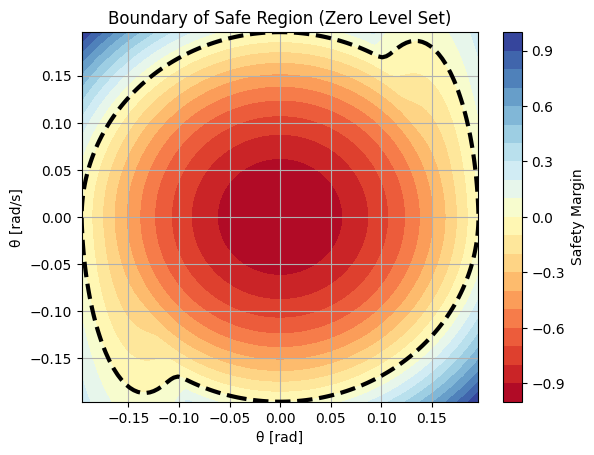

In [ ]:
import matplotlib.pyplot as plt

# Plot filled contours (shows safety margins)
plt.contourf(
    grid.coordinate_vectors[0],  # θ values
    grid.coordinate_vectors[1],  # θ̇ values
    target_values.T,             # Transpose to match grid
    levels=20,
    cmap='RdYlBu'               # Red (unsafe) to Blue (safe)
)
plt.colorbar(label='Safety Margin')

# Highlight the BRT boundary (where target_values = 0)
plt.contour(
    grid.coordinate_vectors[0],
    grid.coordinate_vectors[1],
    target_values.T,
    levels=[0],                 # Only plot the zero level set
    colors='black',
    linewidths=3,
    linestyles='dashed'
)

# Label axes and title
plt.xlabel("θ [rad]")
plt.ylabel("θ̇ [rad/s]")
plt.title("Boundary of Safe Region (Zero Level Set)")
plt.grid(True)
plt.show()

### Extracting the CBF from HJ value function

the safe set is defined as:

\begin{align*}
S = \{x \in \mathbb{R}^2 : b(x)\ge 0\}
\end{align*}

where we can extract the function $b(x)$ from the value function HJ backward reachable tube $V(x,t)$ as:
\begin{align*}
b(x) = - V(x, t)
\end{align*}

In [ ]:
h = -target_values

we enforce safety by ensuring that the CBF condition holds:

\begin{align*}
\frac{\partial b}{\partial t} f(x,u,d) \ge -\alpha(b(x))
\end{align*}

where $\alpha(b(x))$ is a class $\mathcal{K}$ function

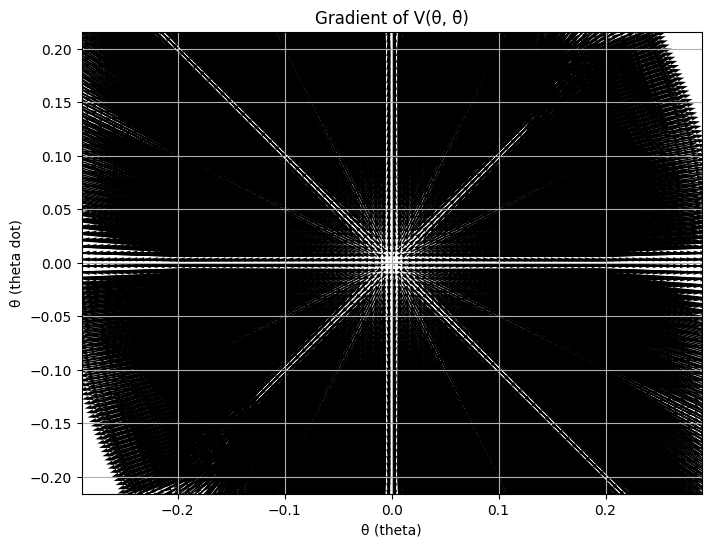

In [ ]:
from jax import grad, vmap

def numerical_gradient(values, grid):
    dx_theta = (grid.domain.hi[0] - grid.domain.lo[0]) / (grid.shape[0] - 1)
    dx_thetadot = (grid.domain.hi[1] - grid.domain.lo[1]) / (grid.shape[1] - 1)

    # Central differences
    dV_dtheta = (values[2:, 1:-1] - values[:-2, 1:-1]) / (2 * dx_theta)
    dV_dthetadot = (values[1:-1, 2:] - values[1:-1, :-2]) / (2 * dx_thetadot)

    # Pad gradients to match original shape (100, 100)
    dV_dtheta = jnp.pad(dV_dtheta, ((1, 1), (1, 1)), mode='edge')
    dV_dthetadot = jnp.pad(dV_dthetadot, ((1, 1), (1, 1)), mode='edge')

    return jnp.stack([dV_dtheta, dV_dthetadot], axis=-1)

grad_V = numerical_gradient(target_values, grid)

import matplotlib.pyplot as plt
import numpy as np

# Convert JAX array to NumPy (if needed)
grad_V_np = np.array(grad_V)  # shape: (100, 100, 2)

# Extract components
dV_dtheta = grad_V_np[:, :, 0]
dV_dthetadot = grad_V_np[:, :, 1]

# Generate grid of coordinates
theta_vals = np.linspace(grid.domain.lo[0], grid.domain.hi[0], grid.shape[0])
thetadot_vals = np.linspace(grid.domain.lo[1], grid.domain.hi[1], grid.shape[1])
T, Tdot = np.meshgrid(theta_vals, thetadot_vals, indexing='ij')

# Quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(T, Tdot, dV_dtheta, dV_dthetadot, scale=50, headwidth=3)
plt.xlabel("θ (theta)")
plt.ylabel("θ̇ (theta dot)")
plt.title("Gradient of V(θ, θ̇)")
plt.grid(True)
plt.axis("equal")
plt.show()



In [ ]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator

# Convert target_values and gradients to NumPy arrays before interpolation
V_np = np.array(target_values)
grad_V_np = np.array(grad_V)  # shape (100, 100, 2)

# Grids (assumed to be 1D arrays representing θ and θ̇)
theta_vals = np.linspace(grid.domain.lo[0], grid.domain.hi[0], grid.shape[0])
thetadot_vals = np.linspace(grid.domain.lo[1], grid.domain.hi[1], grid.shape[1])

# Create interpolators
V_interp = RegularGridInterpolator((theta_vals, thetadot_vals), V_np)
grad_V_theta_interp = RegularGridInterpolator((theta_vals, thetadot_vals), grad_V_np[:, :, 0])
grad_V_thetadot_interp = RegularGridInterpolator((theta_vals, thetadot_vals), grad_V_np[:, :, 1])


def get_b_and_gradb(x):
    V_x = V_interp(x)
    grad_V_x = jnp.array([grad_V_theta_interp(x), grad_V_thetadot_interp(x)])
    b_x = -V_x
    grad_b_x = -grad_V_x
    return b_x, grad_b_x


In [ ]:
import cvxpy as cp
import numpy as np

def solve_cbf_qp(x, u_des, dynamics, gamma=1.0, T_max=1.0, d_max=0.1):
    """
    Solve QP to find safe control input u_safe minimizing (u - u_des)^2
    subject to CBF constraint with worst-case disturbance and input saturation.

    Inputs:
        x: current state np.array shape (2,)
        u_des: desired control input (float)
        dynamics: your dynamics object with required methods
        gamma: CBF gain
        T_max: max control input magnitude
        d_max: max disturbance magnitude

    Returns:
        u_safe: safe control input (float)
    """
    # Get CBF value and gradient
    b_x, grad_b_x = get_b_and_gradb(x)  # you already have this defined
    grad_b_x = grad_b_x.flatten()  # shape (2,)

    # Open-loop dynamics f(x)
    f_x = dynamics.open_loop_dynamics(x, time=0.)  # shape (2,)

    # Control Jacobian g(x)
    g_x = dynamics.control_jacobian(x, time=0.)   # shape (2,1)
    g_x = g_x.flatten()  # shape (2,)

    # Disturbance Jacobian w(x)
    w_x = dynamics.disturbance_jacobian(x, time=0.)  # shape (2,1)
    w_x = w_x.flatten()

    # Worst-case disturbance effect on b_dot (maximize over disturbance bound)
    worst_case_disturbance = d_max * np.abs(grad_b_x @ w_x)

    # Define optimization variable
    u = cp.Variable(1)

    # Define CBF constraint (robustified)
    cbf_constraint = grad_b_x @ (f_x + g_x * u) + gamma * b_x >= worst_case_disturbance

    # Define control saturation constraints
    constraints = [cbf_constraint, u >= -T_max, u <= T_max]

    # Define cost function (minimize deviation from desired input)
    cost = cp.square(u - u_des)

    prob = cp.Problem(cp.Minimize(cost), constraints)

    prob.solve()  # or another solver available

    if u.value is None:
        print("QP failed to find solution, returning u_des clipped")
        return np.clip(u_des, -T_max, T_max)

    return float(u.value)


In [ ]:
import numpy as np

# Simulation parameters
dt = 0.01
T_sim = 10.0
num_steps = int(T_sim / dt)

# Initialize state, e.g., pendulum at 0.5 rad with zero velocity
x = np.array([jnp.pi/16, 0.0])

# Logs
x_log = [x.copy()]
u_log = []
d_log = []

for step in range(num_steps):
    # Sample random disturbance uniformly within bounds
    d_t = np.random.uniform(-d_max, d_max)

    # Solve QP for safe control input (robustified)
    u_safe = solve_cbf_qp(x, u_des=0.0, dynamics=dynamics, gamma=1.0, T_max=T_max, d_max=d_max)

    # Log control and disturbance
    u_log.append(u_safe)
    d_log.append(d_t)

    # Compute state derivative with actual disturbance and control
    x_dot = dynamics.open_loop_dynamics(x, time=0.) + \
            dynamics.control_jacobian(x, time=0.).flatten() * u_safe + \
            dynamics.disturbance_jacobian(x, time=0.).flatten() * d_t

    # Euler integration step
    x = x + dt * x_dot

    # Log state
    x_log.append(x.copy())

# Convert logs to arrays
x_log = np.array(x_log)    # shape (num_steps+1, 2)
u_log = np.array(u_log)    # shape (num_steps,)
d_log = np.array(d_log)    # shape (num_steps,)


QP failed to find solution, returning u_des clipped
QP failed to find solution, returning u_des clipped
QP failed to find solution, returning u_des clipped
QP failed to find solution, returning u_des clipped
QP failed to find solution, returning u_des clipped
QP failed to find solution, returning u_des clipped
QP failed to find solution, returning u_des clipped
QP failed to find solution, returning u_des clipped
QP failed to find solution, returning u_des clipped


ValueError: One of the requested xi is out of bounds in dimension 1

## Trying to use LQR with known wind column

### Our fixed tether dynamics
The fixed tether dynamics are obtained by taking the equilibrium of forces in the tangential direction:
\begin{align*}
x &= l \sin{\theta(t)} \\
\dot{x} &= l \cos{\theta(t)} \dot{\theta(t)}
\end{align*}

\begin{align*}
\Sigma F_{\text{tangential}} &= T - mg \sin{\theta} + C_D (V_{\text{wind}} - \dot{x})  = T - mg \sin{\theta} + C_D (V_{\text{wind}}- l \cos{\theta}\dot{\theta}) = ml \ddot{\theta}\\
\implies \ddot{\theta} &= \frac{T}{ml} - \frac{g}{l}\sin{\theta} +\frac{C_D}{ml}(V_{\text{wind}} - l \cos{\theta}\dot{\theta})\\
\end{align*}

defining our state, control, and disturbance vectors as:
\begin{align*}
x &= \begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix}, \quad
u = \begin{bmatrix}
T
\end{bmatrix}, \quad
d = \begin{bmatrix}
V_{\text{wind}}
\end{bmatrix}
\end{align*}

In matrix form, the dynamics can be expressed as:
\begin{align*}
\dot{x} &= f(x,u,d) = \begin{bmatrix}
\dot{\theta} \\
\frac{T}{ml} - \frac{g}{l}\sin{\theta} + \frac{C_D}{ml}(V_{\text{wind}} - l \cos{\theta}\dot{\theta})
\end{bmatrix}
\end{align*}

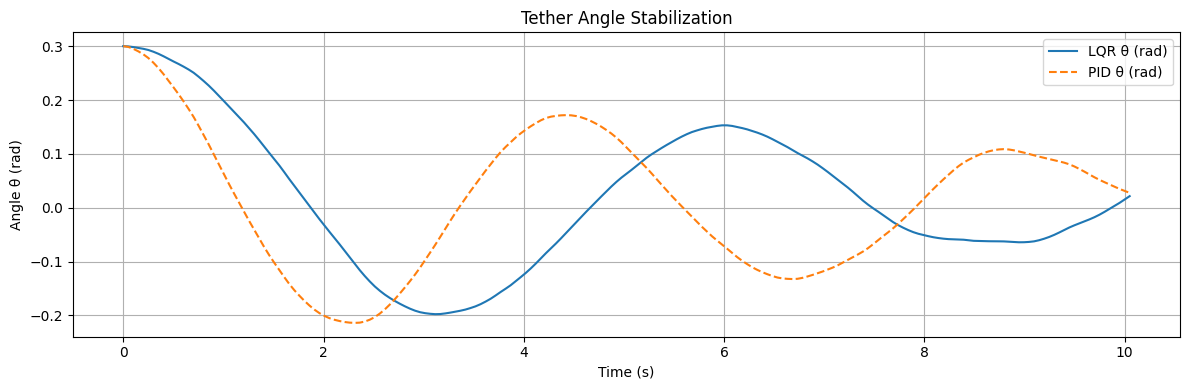

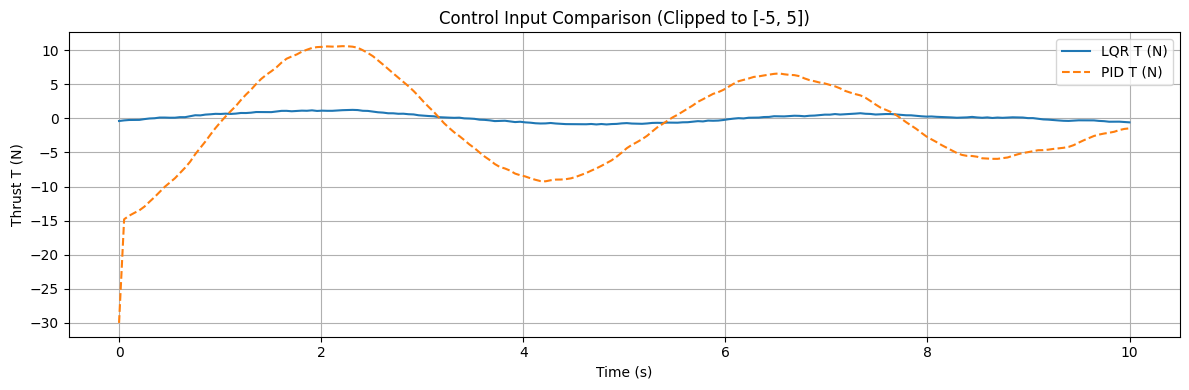

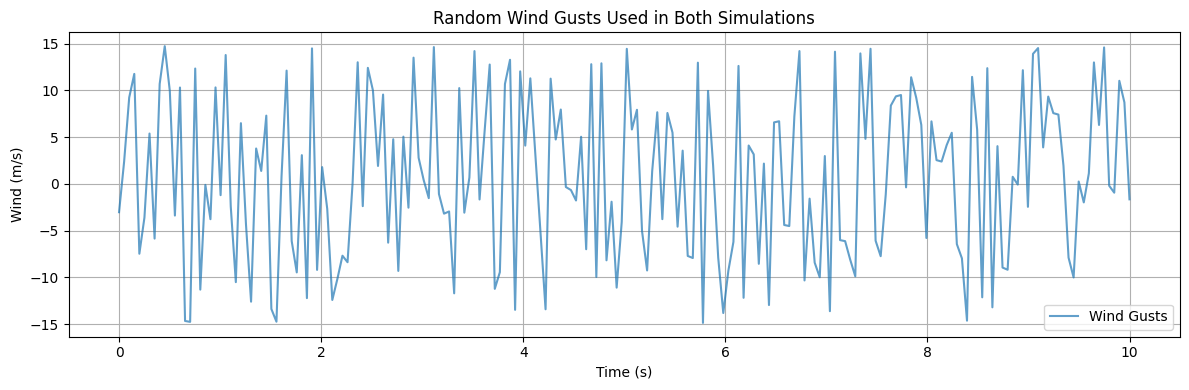

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import functools
import numpy as np
from scipy.linalg import solve_continuous_are

# Constants
g = 9.81      # gravity [m/s^2]
l = 10.0      # tether length [m]
m = 4.0       # mass [kg]
C_D = 1.0     # drag coefficient [kg/m]
T_hover = 0.0  # nominal thrust

# Wind gust bounds
wind_min, wind_max = -15.0, 15.0  # m/s
T_min, T_max = -30.0, 30.0        # thrust limits

# Runge-Kutta Integrator
def runge_kutta_integrator(dynamics, dt=0.1):
    def integrator(x, u, t, d):
        dt2 = dt / 2.0
        k1 = dynamics(x, u, t, d)
        k2 = dynamics(x + dt2 * k1, u, t + dt2, d)
        k3 = dynamics(x + dt2 * k2, u, t + dt2, d)
        k4 = dynamics(x + dt * k3, u, t + dt, d)
        return x + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return integrator

# Dynamics
def tether_dynamics(x, u, t, d):
    theta, theta_dot = x
    T = u[0]
    V_wind = d[0]
    theta_ddot = (T / (m * l)
                  - (g / l) * jnp.sin(theta)
                  + (C_D / (m * l)) * (V_wind - l * jnp.cos(theta) * theta_dot))
    return jnp.array([theta_dot, theta_ddot])

# Linearize using JAX Jacobians
@functools.partial(jax.jit, static_argnames=["dynamics"])
def linearize(dynamics, state, control, t, disturbance):
    A, B = jax.jacobian(dynamics, [0, 1])(state, control, t, disturbance)
    C = dynamics(state, control, t, disturbance) - A @ state - B @ control
    return A, B, C

# Continuous-time LQR
def lqr(A, B, Q, R):
    P = solve_continuous_are(A, B, Q, R)
    K = jnp.array(jnp.linalg.inv(R) @ (B.T @ P))
    return K

# PID controller with clipping
class PIDController:
    def __init__(self, Kp, Ki, Kd, dt, u_min, u_max):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dt = dt
        self.u_min = u_min
        self.u_max = u_max
        self.integral = 0.0
        self.prev_error = 0.0

    def reset(self):
        self.integral = 0.0
        self.prev_error = 0.0

    def update(self, error):
        self.integral += error * self.dt
        derivative = (error - self.prev_error) / self.dt
        self.prev_error = error
        u = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        return jnp.clip(u, self.u_min, self.u_max)

# Modified simulate functions to accept wind array instead of sampling inside loop
def simulate_lqr_wind(x0, wind_array, dt=0.05):
    integrator = runge_kutta_integrator(tether_dynamics, dt=dt)
    Q = jnp.diag(jnp.array([10.0, 1.0]))
    R = jnp.array([[0.1]])

    x = x0
    t = 0.0
    xs, us = [x], []

    for V_wind in wind_array:
        d = jnp.array([V_wind])

        A, B, _ = linearize(tether_dynamics, x, jnp.array([T_hover]), t, d)
        K = lqr(jnp.array(A), jnp.array(B), Q, R)

        u = jnp.clip(jnp.array([T_hover]) - K @ x, T_min, T_max)
        us.append(u)

        x = integrator(x, u, t, d)
        xs.append(x)
        t += dt

    return jnp.stack(xs), jnp.stack(us)

def simulate_pid_wind(x0, wind_array, dt=0.05):
    integrator = runge_kutta_integrator(tether_dynamics, dt=dt)
    pid = PIDController(Kp=50.0, Ki=5.0, Kd=10.0, dt=dt, u_min=T_min, u_max=T_max)

    x = x0
    t = 0.0
    xs, us = [x], []

    for V_wind in wind_array:
        d = jnp.array([V_wind])

        theta_error = -x[0]
        u = jnp.array([pid.update(theta_error)])
        us.append(u)

        x = integrator(x, u, t, d)
        xs.append(x)
        t += dt

    return jnp.stack(xs), jnp.stack(us)

# Pre-generate wind gusts once
dt = 0.05
T_total = 10.0
num_steps = int(T_total / dt)
fixed_wind = np.random.uniform(wind_min, wind_max, size=num_steps)

# Run both simulations with the same wind gusts
x0 = jnp.array([0.3, 0.0])
xs_lqr, us_lqr = simulate_lqr_wind(x0, fixed_wind, dt=dt)
xs_pid, us_pid = simulate_pid_wind(x0, fixed_wind, dt=dt)

# Time vector for plotting
ts = jnp.linspace(0, dt * len(xs_lqr), len(xs_lqr))

# === Plot comparisons (same as before) ===
plt.figure(figsize=(12, 4))
plt.plot(ts, xs_lqr[:, 0], label="LQR θ (rad)", linestyle='-')
plt.plot(ts, xs_pid[:, 0], label="PID θ (rad)", linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Angle θ (rad)")
plt.title("Tether Angle Stabilization")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(ts[:-1], [u[0] for u in us_lqr], label="LQR T (N)", linestyle='-')
plt.plot(ts[:-1], [u[0] for u in us_pid], label="PID T (N)", linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Thrust T (N)")
plt.title("Control Input Comparison (Clipped to [-5, 5])")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(ts[:-1], fixed_wind, label="Wind Gusts", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Wind (m/s)")
plt.title("Random Wind Gusts Used in Both Simulations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

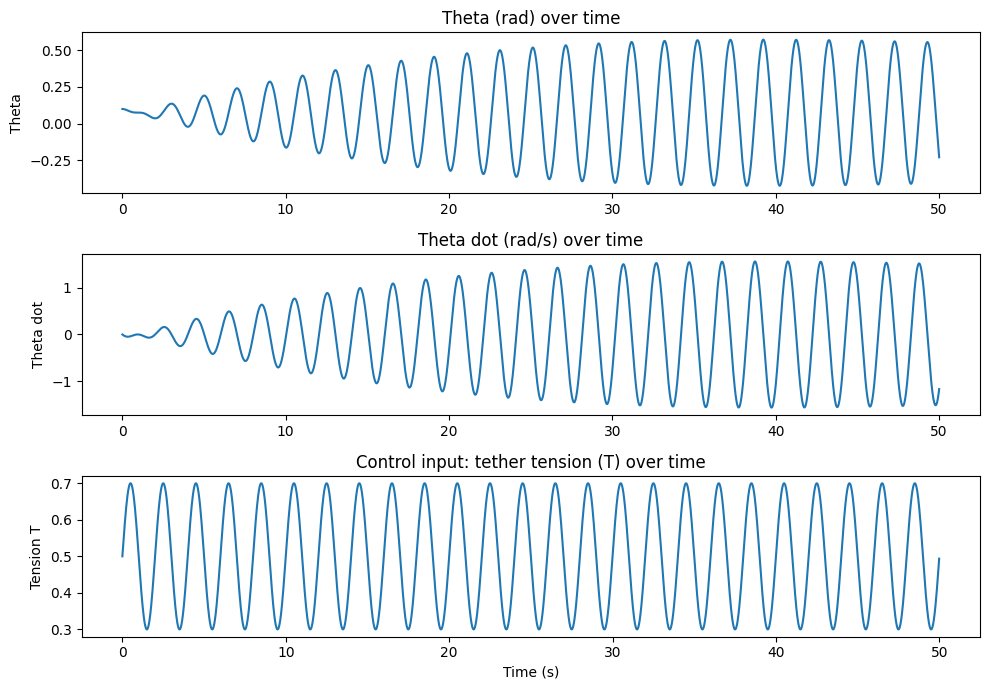

In [ ]:
import jax
import jax.numpy as jnp
import functools
import matplotlib.pyplot as plt

# Constants
m = 1.0
l = 1.0
g = 9.81
C_D = 0.1

def tether_dynamics(x, u, t, d):
    theta, theta_dot = x
    T = u[0]
    V_wind = d[0]
    theta_ddot = (T / (m * l)
                  - (g / l) * jnp.sin(theta)
                  + (C_D / (m * l)) * (V_wind - l * jnp.cos(theta) * theta_dot))
    return jnp.array([theta_dot, theta_ddot])

def runge_kutta_integrator(dynamics, dt=0.01):
    def integrator(x, u, t, d):
        dt2 = dt / 2.0
        k1 = dynamics(x, u, t, d)
        k2 = dynamics(x + dt2 * k1, u, t + dt2, d)
        k3 = dynamics(x + dt2 * k2, u, t + dt2, d)
        k4 = dynamics(x + dt * k3, u, t + dt, d)
        return x + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return integrator

@functools.partial(jax.jit, static_argnames=["dynamics"])
def linearize(dynamics, state, control, t, disturbance):
    A, B = jax.jacobian(lambda x, u: dynamics(x, u, t, disturbance), (0, 1))(state, control)
    C = dynamics(state, control, t, disturbance) - A @ state - B @ control
    return A, B, C

# Simulation parameters
dt = 0.01
T_final = 50
steps = int(T_final / dt)

# Initial state
x = jnp.array([0.1, 0.0])

# Disturbance (constant wind)
d = jnp.array([2.0])

integrator = runge_kutta_integrator(tether_dynamics, dt)

xs = [x]
us = []
ts = [0.0]

for i in range(steps):
    t = i * dt
    # Example control: tether tension oscillates sinusoidally between 0.3 and 0.7
    T_control = 0.5 + 0.2 * jnp.sin(2 * jnp.pi * 0.5 * t)
    u = jnp.array([T_control])
    us.append(T_control)
    
    x = integrator(x, u, t, d)
    xs.append(x)
    ts.append(t + dt)

xs = jnp.stack(xs)
ts = jnp.array(ts)
us = jnp.array(us)

# Plotting
plt.figure(figsize=(10,7))

plt.subplot(3,1,1)
plt.plot(ts, xs[:,0])
plt.title("Theta (rad) over time")
plt.ylabel("Theta")

plt.subplot(3,1,2)
plt.plot(ts, xs[:,1])
plt.title("Theta dot (rad/s) over time")
plt.ylabel("Theta dot")

plt.subplot(3,1,3)
plt.plot(ts[:-1], us)  # control is length steps, ts has one extra point
plt.title("Control input: tether tension (T) over time")
plt.xlabel("Time (s)")
plt.ylabel("Tension T")

plt.tight_layout()
plt.show()


In [ ]:
import jax.numpy as jnp
from jax import jit, grad, lax, random
from functools import partial
import jax.numpy as jnp
from jax import jit, grad, lax, random
from functools import partial

from functools import partial
from jax import jit, lax

import jax
import jax.numpy as jnp
from jax import random, jit, vmap
import numpy as np
import matplotlib.pyplot as plt
